## SLU17 - Ethics & Fairness - Learning notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')
import hashlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
%matplotlib inline

import pandas as pd

from sklearn.metrics import confusion_matrix

from utils.utils import make_data

# Criminal justice bias

Exercise adaptated from the book [Fairness and Machine Learning by Solon Barocas, Moritz Hardt, and Arvind Narayanan](https://fairmlbook.org/pdf/fairmlbook.pdf).

Based on the ProPublica's article [Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) about a proprietary risk score, called COMPAS, used in the US.

This is the problem setting:

> Risk assessment is an important component of the criminal justicesystem. In the United States, judges set bail and decide pre-trialdetention based on their assessment of the risk that a released defen-dant would fail to appear at trial or cause harm to the public.

These scores are intended to assess the risk thata defendant will re-offend, a task often called **recidivism prediction**.

We’ll use data obtained and released by ProPublica.

In [2]:
data = make_data()

In [4]:
data

,sex,age,age_cat,race,decile_score,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_charge_degree,is_recid,score_text,two_year_recid
0,Male,69,Greater than 45,Other,1,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,F,0,Low,0
1,Male,34,25 - 45,African-American,3,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,F,1,Low,1
2,Male,24,Less than 25,African-American,4,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,F,1,Low,1
5,Male,44,25 - 45,Other,1,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,M,0,Low,0
6,Male,41,25 - 45,Caucasian,6,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,F,1,Medium,1
7,Male,43,25 - 45,Other,4,3,-1.0,2013-08-29 08:55:23,2013-08-30 08:42:13,F,0,Low,0
8,Female,39,25 - 45,Caucasian,1,0,-1.0,2014-03-15 05:35:34,2014-03-18 04:28:46,M,0,Low,0
10,Male,27,25 - 45,Caucasian,4,0,-1.0,2013-11-25 06:31:06,2013-11-26 08:26:57,F,0,Low,0
11,Male,23,Less than 25,African-American,6,3,0.0,2013-10-03 04:07:35,2013-10-07 08:17:30,M,1,Medium,1
12,Female,37,25 - 45,Caucasian,1,0,0.0,2013-01-01 03:28:03,2013-01-02 01:12:19,M,0,Low,0


## Exercise 1 - Score distribution

### Score distribution

Plot the histogram of the scores, `decile_score`.

Suggestion: Use `Series.hist(histtype='step')`.

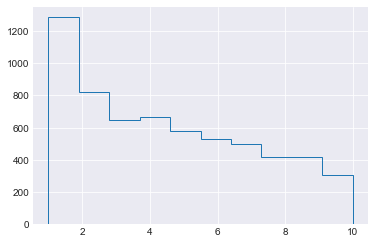

In [5]:
# YOUR CODE HERE
data['decile_score'].hist(histtype='step')

### Score distribution by race

Plot the histogram of the scores for black (`race == "African-American"`) and white defendants (`race == "Caucasian"`).

#### White Defendants’ Risk Scores

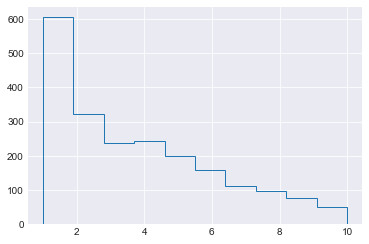

In [11]:
# YOUR CODE HERE
data[data['race']=="Caucasian"]['decile_score'].hist(histtype='step')

#### Black Defendants’ Risk Scores

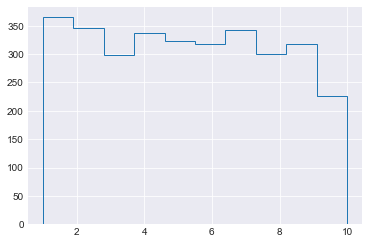

In [12]:
# YOUR CODE HERE
data[data['race']=="African-American"]['decile_score'].hist(histtype='step')

### Interpretation

Based on these plots, what would you conclude from the distributions. Uncomment the correct answer.

In [15]:
# hypothesis_1 = 'The distribution of the scores are similar for both populations.'
hypothesis_1 = 'Scores for white defendants are skewed toward lower-risk categories.'
# hypothesis_1 = 'Scores for black defendants are skewed toward lower-risk categories.'

# YOUR CODE HERE


In [16]:
expected_hash_1 = '1d0a31bdfb0e6cd81f854bad389789d7fd0022bdf92534fc6fbd0c80bc40e817'
assert hashlib.sha256(str(hypothesis_1).encode('utf-8')).hexdigest() == expected_hash_1

## Exercise 2 - Error rates

### Overall

Plot the histogram of scores received by the positive class (recidivists). Use the column `two_year_recid`.

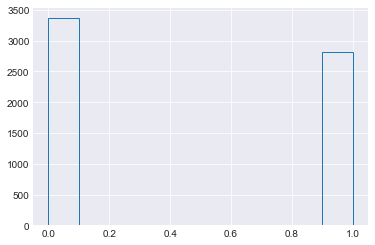

In [20]:
# YOUR CODE HERE
data['two_year_recid'].hist(histtype='step')

Overall, the risk score doesn't appear to be particularly good at separating recidivists.

(The resulting histogram should resemble a uniform distribution.)

### By race

Plot the same histogram for black (`race == "African-American"`) and white defendants (`race == "Caucasian"`).

#### White Defendants

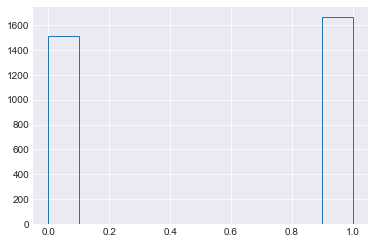

In [21]:
# YOUR CODE HERE
data[data['race']=="African-American"]['two_year_recid'].hist(histtype='step')

#### Black Defendants

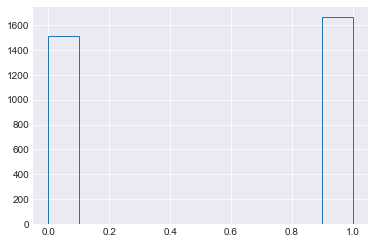

In [22]:
# YOUR CODE HERE
data[data['race']=="African-American"]['two_year_recid'].hist(histtype='step')

## Interpretation

Based on these results, uncomment the correct answer.

(Remember, these histograms report to **actual recidivists**.)  

In [ ]:
# hypothesis_2 = 'The distribution of recidivists scores is similar in both groups.'
# hypothesis_2 = 'Scores for white recidivists are skewed toward lower-risk categories.'
# hypothesis_2 = 'Scores for black recidivists are skewed toward lower-risk categories.'

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
expected_hash_2 = '8fb14ceb9ee8aefb715152afa576bb0f7af71bb7671062a8d94c1b813897b936'
assert hashlib.sha256(str(hypothesis_2).encode('utf-8')).hexdigest() == expected_hash_2

## Exercise 3 - When predictions fail differently

Defendants with `decile_score` higher then 3 are classified as high-risk of recidivism.

We use `scikit-learn` to compute the confusion matrix by race for us.

### False Positive Rate (FPR)

The false positive rate, also known as probability of false alarm, is given by:

$$FPR = \frac{FP}{FP + TN} = \frac{FP}{N}$$

Where $FP$ is the number of false positives, $TN$ is the number of true negatives, and $N$ the total number of negatives.

Below, we compute the global FPR of the `decile_score`.

In [ ]:
y_true = data['two_year_recid']
y_pred = data['decile_score'] > 3

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

fpr = fp / (fp + tn)

#### White Defendants

Compute the FPR for white defendants.

In [ ]:
# fpr_w = ...
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
expected_hash_3 = 'e965f1b975608cb0d1dad8c30d17e0fe1bdea42df938c0bdc29d75c97b45c44b'
assert hashlib.sha256(str(fpr_w).encode('utf-8')).hexdigest() == expected_hash_3

#### White Defendants

Compute the FPR for white defendants.

In [ ]:
# fpr_b = ...
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
expected_hash_4 = 'cf02b41f6e864ab268445231ae33031b1882ea5157ac7da2dd2437e05b8d477f'
assert hashlib.sha256(str(fpr_b).encode('utf-8')).hexdigest() == expected_hash_4